<a href="https://colab.research.google.com/github/salmonin-o3o/ESAA_study/blob/main/ESAA_miniproject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from google.colab import drive
drive.mount('/content/drive')
movie_df = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/movies_train.csv')
movie_df_test = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/movies_test.csv')
submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/submission.csv')
print(movie_df.shape)
movie_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(600, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
movie_df_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [6]:
movie_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [7]:
# 결측값 제거 후 확인
movie_df['dir_prev_bfnum'] = movie_df['dir_prev_bfnum'].fillna(0)
movie_df_test['dir_prev_bfnum'] = movie_df_test['dir_prev_bfnum'].fillna(0)

In [8]:
print(movie_df['dir_prev_bfnum'].isna().sum())
print(movie_df_test['dir_prev_bfnum'].isna().sum())

0
0


In [9]:
# datetime 오브젝트로 변환
from datetime import datetime
import os

movie_df['release_time']=pd.to_datetime(movie_df['release_time'])
movie_df_test['release_time']=pd.to_datetime(movie_df_test['release_time'])

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [10]:
# 문자열을 datetime 타입으로 변경,
movie_df['release_time'] = movie_df.release_time.apply(pd.to_datetime)
movie_df_test['release_time'] = movie_df_test.release_time.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
movie_df['year'] = movie_df.release_time.apply(lambda x : x.year)
movie_df['month'] = movie_df.release_time.apply(lambda x : x.month)
movie_df['day'] = movie_df.release_time.apply(lambda x : x.day)
movie_df.head(3)

movie_df_test['year'] = movie_df_test.release_time.apply(lambda x : x.year)
movie_df_test['month'] = movie_df_test.release_time.apply(lambda x : x.month)
movie_df_test['day'] = movie_df_test.release_time.apply(lambda x : x.day)
movie_df_test.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month,day
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,2010,1,7
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,2010,1,14
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,2010,1,28


In [11]:
# year, month, day 칼럼 추가 후 datetime 칼럼 삭제
drop_columns = ['release_time']
movie_df.drop(drop_columns, axis=1, inplace=True)
movie_df_test.drop(drop_columns, axis=1, inplace=True)

In [12]:
# 'distributor' column
# 공백 문제 해결
movie_df['distributor'] = movie_df['distributor'].str.replace(r'([a-zA-Z])\s+([가-힣])', r'\1\2', regex=True)
movie_df['distributor'] = movie_df['distributor'].str.replace(r'([가-힣])\s+([a-zA-Z])', r'\1\2', regex=True)
movie_df['distributor'] = movie_df['distributor'].str.replace(r'\s+', '', regex=True)
movie_df['distributor'] = movie_df['distributor'].str.replace(r'([^()]+)주$', r'(주)\1', regex=True)
movie_df['distributor'] = movie_df['distributor'].str.replace(r'\(\)', '', regex=True)
movie_df['distributor'] = movie_df['distributor'].str.replace(r'\x01', '', regex=True)
movie_df['distributor'] = movie_df['distributor'].str.strip()

# 맞춤법 및 누락 문제 해결
movie_df['distributor'] = movie_df['distributor'].replace({r'리틀빅픽쳐스': '리틀빅픽처스'}, regex=True)
movie_df['distributor'] = movie_df['distributor'].replace({r'^무비꼴라쥬$': 'CGV무비꼴라쥬'}, regex=True)

# 수동 mapping으로 이름 통일
distributor_mapping = {
    '마운틴픽처스': '(주)마운틴픽쳐스',
    'NEW': '(주)NEW',
    '리틀빅픽처스': '(주)리틀빅픽처스',
    '드림팩트엔터테인먼트': '(주)드림팩트엔터테인먼트',
    '에이원엔터테인먼트': '(주)에이원 엔터테인먼트'
}

movie_df['distributor'] = movie_df['distributor'].replace(distributor_mapping)

# test 데이터셋
movie_df_test['distributor'] = movie_df_test['distributor'].str.replace(r'([a-zA-Z])\s+([가-힣])', r'\1\2', regex=True)
movie_df_test['distributor'] = movie_df_test['distributor'].str.replace(r'([가-힣])\s+([a-zA-Z])', r'\1\2', regex=True)
movie_df_test['distributor'] = movie_df_test['distributor'].str.replace(r'\s+', '', regex=True)
movie_df_test['distributor'] = movie_df_test['distributor'].str.replace(r'([^()]+)주$', r'(주)\1', regex=True)
movie_df_test['distributor'] = movie_df_test['distributor'].str.replace(r'\(\)', '', regex=True)
movie_df_test['distributor'] = movie_df_test['distributor'].str.replace(r'\x01', '', regex=True)
movie_df_test['distributor'] = movie_df_test['distributor'].str.strip()

# 맞춤법 및 누락 문제 해결
movie_df_test['distributor'] = movie_df_test['distributor'].replace({r'리틀빅픽쳐스': '리틀빅픽처스'}, regex=True)
movie_df_test['distributor'] = movie_df_test['distributor'].replace({r'^무비꼴라쥬$': 'CGV무비꼴라쥬'}, regex=True)

movie_df_test['distributor'] = movie_df_test['distributor'].replace(distributor_mapping)

In [13]:
print(movie_df['distributor'].unique())
print('\n', movie_df_test['distributor'].unique())

['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '쇼박스(주)미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주)케이알씨지' '(주)콘텐츠윙' '(주)키노아이' '(주)팝파트너스' 'CJE&M영화부문'
 '(주)영화제작전원사' 'CJE&MPictures' 'CGV무비꼴라쥬' '(주)리틀빅픽처스' '스폰지' 'CJ엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사진진' '(주)레인보우팩토리' '김기덕필름' 'CJCGV' '동국대학교충무로영상제작센터' 'BoXoo엔터테인먼트'
 '(주)마운틴픽쳐스' '메가박스(주)플러스엠' '골든타이드픽처스' '파이오니아21' '디씨드' '(주)드림팩트엔터테인먼트'
 '시너지' '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아' '(주)예지림엔터테인먼트' '(주)영화사조제'
 '보람엔터테인먼트' '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨' '(주)대명문화공장' '(주)온비즈넷'
 'KT&G상상마당' '인벤트디' '씨네그루(주)키다리이엔티' '스튜디오후크' '시네마달' '나이너스엔터테인먼트(주)'
 'THE픽쳐스' '영구아트무비' '어뮤즈' '이모션픽처스' '(주)이스트스카이필름' '필라멘트픽쳐스' '조이앤컨텐츠그룹'
 '타임스토리그룹' '(주)휘엔터테인먼트' '이십세기폭스코리아(주)' '(주)피터팬픽쳐스' '에스와이코마드' '(주)더픽쳐스'
 '오퍼스픽쳐스' '(주)고앤고필름' '사람과사람들' '(주)JK필름' '씨너스엔터테인먼트(주)' 'KT' '싸이더스FNH'
 '(주)프레인글로벌' '나우콘텐츠' '홀리가든' '(주)브릿지웍스' '(주)엣나인필름' '위더스필름' '(주)에이원엔터테인먼트'
 'OAL(올)' '싸이더스' '전망좋은영화사' '스토리셋' '이상우필름' '씨네굿필름' '영희야놀자' '찬란' '어썸피플'
 '아방가르드필름' '스크린조이' '와이드릴리즈(주

In [14]:
movie_df.head(3)

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,day
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11,22
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11,19
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6,5


In [15]:
movie_df_test.head(3)

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month,day
0,용서는 없다,시네마서비스,느와르,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,2010,1,7
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,113,12세 관람가,이광재,3.427002e+05,4,275,3,2010,1,14
2,하모니,CJ엔터테인먼트,드라마,115,12세 관람가,강대규,4.206611e+06,3,419,7,2010,1,28




```
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=1)
cat_features = ['year','month','day','screening_rat','genre']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 box_off_num의 합을 표현
    sns.barplot(x=feature, y='box_off_num', data=movie_df, ax=axs[row][col])
```



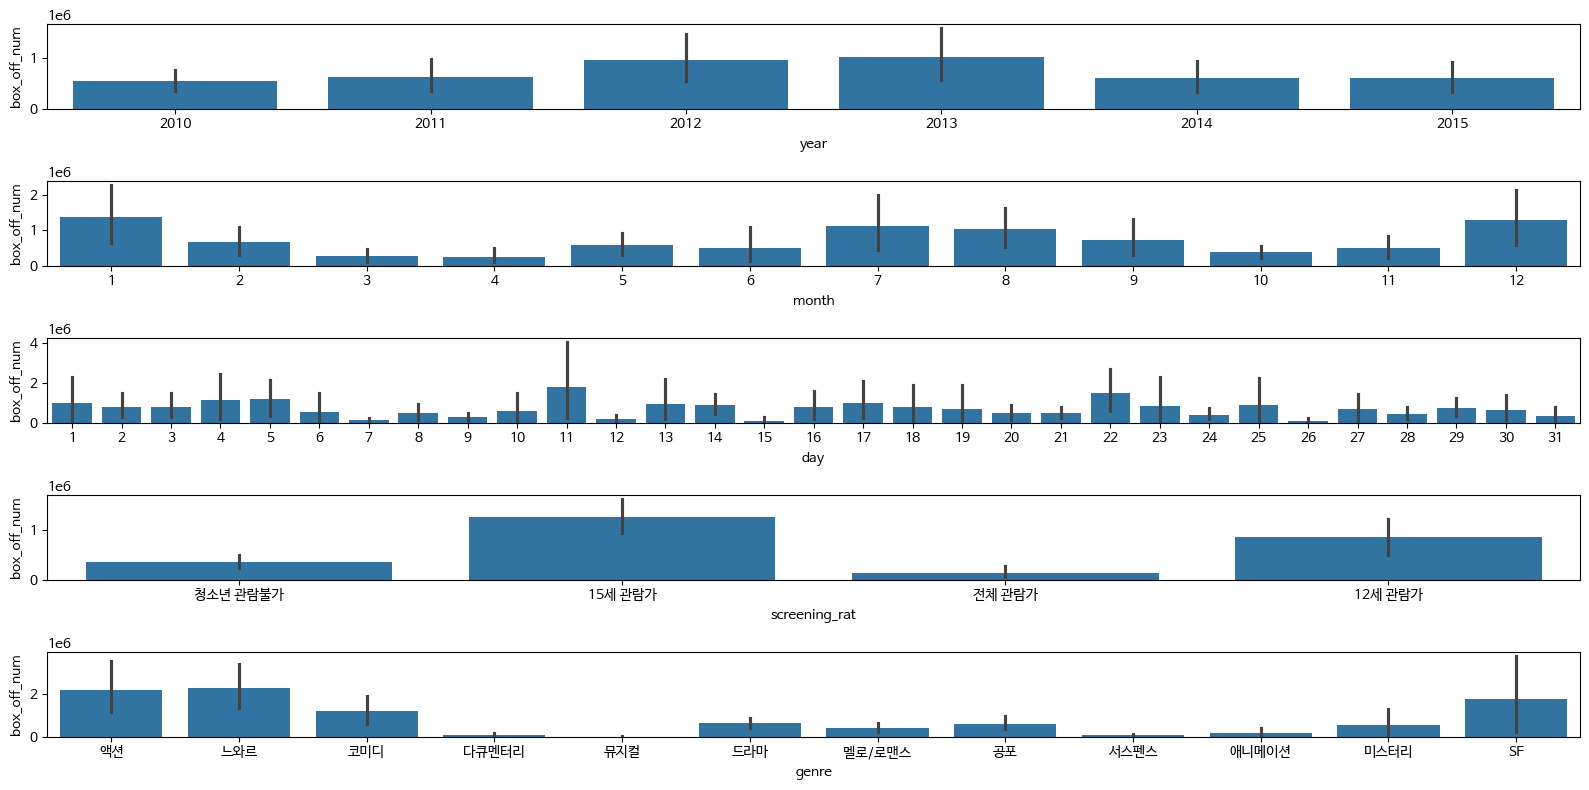

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(16, 8), ncols=1, nrows=5)
cat_features = ['year', 'month', 'day', 'screening_rat', 'genre']

# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    col = i  # axs는 1차원 배열이므로 col만 사용
    # 시본의 barplot을 이용해 칼럼값에 따른 box_off_num의 합을 표현
    sns.barplot(x=feature, y='box_off_num', data=movie_df, ax=axs[col])

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

---
- ### 모델 적용
1. 선형회귀, 릿지, 라쏘 적용

In [17]:
# 숫자 데이터만 이용
X_train = movie_df[['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']]
y_train = movie_df['box_off_num']
X_test = movie_df_test[['time', 'dir_prev_bfnum','dir_prev_num', 'num_staff', 'num_actor']]

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

# 모델 정의
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
lasso_reg = Lasso()
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)  # 오타 수정
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1 * grid_model.best_score_)  # 음수 값을 양수로 변환
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(
        model.__class__.__name__,
        np.round(rmse, 4),
        grid_model.best_params_
    ))

# 하이퍼파라미터 설정
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

# 결과 출력
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 1525498.2083, 최적 alpha: {'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 1525733.441, 최적 alpha: {'alpha': 10}


In [19]:
# 앞의 최적화 alpha 값을 이용해 학습 데이터로 학습, 테스트 데이터로 예측
# LinearRegression 모델 학습
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# 테스트 데이터 예측(관객수는 음수가 나올 수 없으므로 음수이면 0으로 변환)
lr_pred = lr_reg.predict(X_test)
lr_pred = np.maximum(lr_pred, 0)

# Ridge 최적화 모델 학습
ridge_grid = GridSearchCV(ridge_reg, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)
ridge_best_model = ridge_grid.best_estimator_

# 테스트 데이터 예측(관객수는 음수가 나올 수 없으므로 음수이면 0으로 변환)
ridge_pred = ridge_best_model.predict(X_test)
ridge_pred = np.maximum(ridge_pred, 0)

# Lasso 최적화 모델 학습
lasso_grid = GridSearchCV(lasso_reg, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
lasso_best_model = lasso_grid.best_estimator_

# 테스트 데이터 예측(관객수는 음수가 나올 수 없으므로 음수이면 0으로 변환)
lasso_pred = lasso_best_model.predict(X_test)
lasso_pred = np.maximum(lasso_pred, 0)

# 예측 결과를 DataFrame에 추가
# 기존 submission 파일 불러오기
submission['box_off_num'] = lr_pred
submission.to_csv('lr_submission.csv', index=False)

# 각각 다른 파일로 저장
submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/submission.csv')
submission["box_off_num"] = ridge_pred  # Ridge 결과 추가
submission.to_csv("ridge_submission.csv", index=False)

# 각각 다른 파일로 저장
submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/submission.csv')
submission["box_off_num"] = lasso_pred  # Lasso 결과 추가
submission.to_csv("lasso_submission.csv", index=False)
print("Lr과 Ridge와 Lasso 예측 결과가 각각 'lr_submission.csv', 'ridge_submission.csv'와 'lasso_submission.csv'에 저장되었습니다.")


Lr과 Ridge와 Lasso 예측 결과가 각각 'lr_submission.csv', 'ridge_submission.csv'와 'lasso_submission.csv'에 저장되었습니다.


2. 엘라스틱넷 적용

In [20]:
from sklearn.linear_model import ElasticNet

# ElasticNet 모델 정의
elasticnet_reg = ElasticNet()

# 하이퍼파라미터 설정 (alpha와 l1_ratio 조합)
elasticnet_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# ElasticNet 모델 학습 및 최적화
elasticnet_grid = GridSearchCV(elasticnet_reg, param_grid=elasticnet_params,
                               scoring='neg_mean_squared_error', cv=5)
elasticnet_grid.fit(X_train, y_train)

# 최적 모델 확인
elasticnet_best_model = elasticnet_grid.best_estimator_
print("ElasticNet 최적 하이퍼파라미터:", elasticnet_grid.best_params_)

# 테스트 데이터 예측(관객수는 음수가 나올 수 없으므로 음수이면 0으로 변환)
elasticnet_pred = elasticnet_best_model.predict(X_test)
elasticnet_pred = np.maximum(elasticnet_pred, 0)

ElasticNet 최적 하이퍼파라미터: {'alpha': 10, 'l1_ratio': 0.1}


In [21]:
# 기존 submission 파일에 ElasticNet 결과 추가
submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/submission.csv')
submission.head()
submission["box_off_num"] = elasticnet_pred  # ElasticNet 결과 추가

# ElasticNet 결과 저장
submission.to_csv("elasticnet_submission.csv", index=False)

print("ElasticNet 예측 결과가 'elasticnet_submission.csv'에 저장되었습니다.")

ElasticNet 예측 결과가 'elasticnet_submission.csv'에 저장되었습니다.


3. 결정트리 적용

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. 하이퍼파라미터 설정
param_grid = {
    'max_depth': [5, 10, 15, None],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드 최소 샘플 수
}

# 2. GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # MSE 기준
    cv=3,  # 3-Fold Cross Validation
    verbose=2,
    n_jobs=-1  # 병렬 처리
)

# 3. 학습
grid_search.fit(X_train, y_train)

# 4. 최적의 하이퍼파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)

# 5. 최적화된 모델로 학습 데이터 성능 평가
best_dt_model = grid_search.best_estimator_
train_preds = best_dt_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
r2 = r2_score(y_train, train_preds)

print(f"결정트리 모델 성능 (최적화 후):")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 6. 테스트 데이터 예측
dectree_preds = best_dt_model.predict(X_test)
dectree_preds = np.maximum(dectree_preds, 0)

# 7. 결과 저장
submission['box_off_num'] = dectree_preds
submission.to_csv('submission_decision_tree_optimized.csv', index=False)
print("최적화된 결정트리 결과가 submission_decision_tree_optimized.csv 파일로 저장되었습니다.")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
결정트리 모델 성능 (최적화 후):
MSE: 1266713400472.85
R2 Score: 0.62
최적화된 결정트리 결과가 submission_decision_tree_optimized.csv 파일로 저장되었습니다.


4. 랜덤포레스트 적용

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 하이퍼파라미터 설정
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [10, 20, None],  # 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드 최소 샘플 수
}

# 2. GridSearchCV 설정
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 3. 학습
grid_search_rf.fit(X_train, y_train)

# 4. 최적화된 모델로 성능 평가
best_rf_model = grid_search_rf.best_estimator_
rf_train_preds = best_rf_model.predict(X_train)

# 학습 데이터 성능 평가
rf_mse = mean_squared_error(y_train, rf_train_preds)
rf_r2 = r2_score(y_train, rf_train_preds)

print("랜덤포레스트 모델 성능:")
print(f"MSE: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")

# 5. 테스트 데이터 예측
rf_preds = best_rf_model.predict(X_test)
rf_preds = np.maximum(rf_preds, 0)  # 음수값 제거

# 6. 결과 저장
submission['box_off_num'] = rf_preds
submission.to_csv('submission_random_forest_optimized.csv', index=False)
print("랜덤포레스트 결과 저장 완료: submission_random_forest_optimized.csv")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
랜덤포레스트 모델 성능:
MSE: 976458188873.86
R² Score: 0.71
랜덤포레스트 결과 저장 완료: submission_random_forest_optimized.csv


5. GBM 적용

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 하이퍼파라미터 설정
param_grid_gbm = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'max_depth': [3, 5, 7],  # 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드 최소 샘플 수
}

# 2. GridSearchCV 설정
grid_search_gbm = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gbm,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 3. 학습
grid_search_gbm.fit(X_train, y_train)

# 4. 최적화된 모델로 성능 평가
best_gbm_model = grid_search_gbm.best_estimator_
gbm_train_preds = best_gbm_model.predict(X_train)

# 학습 데이터 성능 평가
gbm_mse = mean_squared_error(y_train, gbm_train_preds)
gbm_r2 = r2_score(y_train, gbm_train_preds)

print("GBM 모델 성능:")
print(f"MSE: {gbm_mse:.2f}")
print(f"R² Score: {gbm_r2:.2f}")

# 5. 테스트 데이터 예측
gbm_preds = best_gbm_model.predict(X_test)
gbm_preds = np.maximum(gbm_preds, 0)  # 음수값 제거

# 6. 결과 저장
submission['box_off_num'] = gbm_preds
submission.to_csv('submission_gbm_optimized.csv', index=False)
print("GBM 결과 저장 완료: submission_gbm_optimized.csv")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
GBM 모델 성능:
MSE: 1565122014868.26
R² Score: 0.53
GBM 결과 저장 완료: submission_gbm_optimized.csv


- 요약
    - 결정트리 (Decision Tree): 간단한 트리 기반 모델. 빠르게 실행 가능.
    - 랜덤포레스트 (Random Forest): 다수의 트리를 앙상블로 조합. 과적합 방지와 높은 성능.
    - GBM (Gradient Boosting Machine): 순차적으로 트리를 학습. 높은 성능을 발휘하나 속도는 다소 느림.

6. XGBoost 적용

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# XGBoost 하이퍼파라미터 설정
xgb_params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.5, 0.8]
}

xgb_reg = XGBRegressor()

# GridSearch를 사용하여 하이퍼파라미터 설정
grid_xgb = GridSearchCV(estimator=xgb_reg,param_grid=xgb_params,scoring='neg_mean_squared_error',
                        cv=5,verbose=1,n_jobs=-1)

#훈련 데이터 학습
grid_xgb.fit(X_train, y_train)

# 최적 모델 추출
best_model = grid_xgb.best_estimator_

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_xgb.best_params_)

# 훈련 데이터 예측
train_preds = best_model.predict(X_train)
train_preds = np.maximum(train_preds, 0)  #사람 수는 음수일 수 없음

# 테스트 데이터 예측
test_preds = best_model.predict(X_test)
test_preds = np.maximum(test_preds, 0)  #사람 수는 음수일 수 없음

# RMSE 계산
def get_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# 훈련 데이터 RMSE 출력
rmse = get_rmse(y_train, train_preds)
print(f"RMSE: {rmse:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
RMSE: 704912.0687


In [26]:
#XGBoost 예측 결과 저장
submission = pd.DataFrame({"box_off_num": test_preds})
submission.to_csv("xgb_submission.csv", index=False)
print("XGBoost 예측 결과가 'xgb_submission.csv'에 저장되었습니다.")

XGBoost 예측 결과가 'xgb_submission.csv'에 저장되었습니다.


7. LightGBM 적용

In [27]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# LightGBM 파라미터 설정
lgbm_params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [4, 8, 16],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8],
    'reg_lambda': [1, 5, 10]
}

lgbm_reg = LGBMRegressor()

# GridSearch를 사용하여 하이퍼파라미터 설정
grid_lgbm = GridSearchCV(
    estimator=lgbm_reg,
    param_grid=lgbm_params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

#훈련 데이터 학습
grid_lgbm.fit(X_train, y_train)

# 최적 모델 추출
best_model = grid_lgbm.best_estimator_

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_lgbm.best_params_)

# 훈련 데이터 예측
train_preds = best_model.predict(X_train)
train_preds = np.maximum(train_preds, 0) #사람 수는 음수일 수 없음

# 테스트 데이터 예측
test_preds = best_model.predict(X_test)
test_preds = np.maximum(test_preds, 0)  #사람 수는 음수일 수 없음

# RMSE 계산 함수
def get_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# RMSE 출력
rmse = get_rmse(y_train, train_preds)
print(f"RMSE: {rmse:.4f}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 5
[LightGBM] [Info] Start training from score 708181.751667
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 4, 'reg_lambda': 1, 'subsample': 0.6}
RMSE: 1274030.7780


In [28]:
# LightGBM 예측 결과 저장
submission = pd.DataFrame({"box_off_num": test_preds})
submission.to_csv("lgbm_submission.csv", index=False)
print("LightGBM 예측 결과가 'lgbm_submission.csv'에 저장되었습니다.")

LightGBM 예측 결과가 'lgbm_submission.csv'에 저장되었습니다.


8. 혼합 모델

In [29]:
from sklearn.model_selection import train_test_split

def get_rmse_pred(preds):
  for key in preds.keys():
    pred_value = preds[key]
    mse = mean_squared_error(y_val, pred_value)
    rmse = np.sqrt(mse)
    print('{0} 모델의 RMSE: {1}'.format(key, rmse))

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_tr, y_tr)
lr_pred = lr_reg.predict(X_val)
lr_pred = np.maximum(lr_pred, 0)

ridge_grid.fit(X_tr, y_tr)
ridge_best_model = ridge_grid.best_estimator_
ridge_pred = ridge_best_model.predict(X_val)
ridge_pred = np.maximum(ridge_pred, 0)

lasso_grid.fit(X_tr, y_tr)
lasso_best_model = lasso_grid.best_estimator_
lasso_pred = lasso_best_model.predict(X_val)
lasso_pred = np.maximum(lasso_pred, 0)

elasticnet_grid.fit(X_tr, y_tr)
elasticnet_best_model = elasticnet_grid.best_estimator_
elasticnet_pred = elasticnet_best_model.predict(X_val)
elasticnet_pred = np.maximum(elasticnet_pred, 0)

# 개별 모델의 예측값 혼합으로 최종 예측값 도출
pred = 0.1 * lr_pred + 0.1 * ridge_pred + 0.1 * lasso_pred + 0.7 * elasticnet_pred
preds = {'최종 혼합':pred, 'LR':lr_pred, 'Ridge':ridge_pred, 'Lasso':lasso_pred, 'Elasticnet':elasticnet_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 1424322.9558860634
LR 모델의 RMSE: 1424959.3672430862
Ridge 모델의 RMSE: 1424945.6370583228
Lasso 모델의 RMSE: 1424959.5935493386
Elasticnet 모델의 RMSE: 1424401.1714775106


In [30]:
grid_search.fit(X_tr, y_tr)
best_dt_model = grid_search.best_estimator_
dt_pred = best_dt_model.predict(X_val)
dt_pred = np.maximum(dt_pred, 0)

grid_search_rf.fit(X_tr, y_tr)
best_rf_model = grid_search_rf.best_estimator_
rf_pred = best_rf_model.predict(X_val)
rf_pred = np.maximum(rf_pred, 0)

grid_search_gbm.fit(X_tr, y_tr)
best_gbm_model = grid_search_gbm.best_estimator_
gbm_pred = best_gbm_model.predict(X_val)
gbm_pred = np.maximum(gbm_pred, 0)

# 개별 모델의 예측값 혼합으로 최종 예측값 도출
pred = 0.15 *dt_pred + 0.8 * rf_pred + 0.05 * gbm_pred
preds = {'최종 혼합':pred, 'DT':dt_pred, 'RandomForest':rf_pred, 'GBM':gbm_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
최종 혼합 모델의 RMSE: 1337649.8430165786
DT 모델의 RMSE: 1403206.7085364412
RandomForest 모델의 RMSE: 1340129.562674899
GBM 모델의 RMSE: 1409915.0178465976


In [31]:
grid_xgb.fit(X_tr, y_tr)
xgb_best_model = grid_xgb.best_estimator_
xgb_pred = xgb_best_model.predict(X_val)
xgb_pred = np.maximum(xgb_pred, 0)

grid_lgbm.fit(X_tr, y_tr)
lgbm_best_model = grid_lgbm.best_estimator_
lgbm_pred = lgbm_best_model.predict(X_val)
lgbm_pred = np.maximum(lgbm_pred, 0)

# 개별 모델의 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * xgb_pred + 0.6 * lgbm_pred
preds = {'최종 혼합':pred, 'XGBoost':xgb_pred, 'LightGBM':lgbm_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 5
[LightGBM] [Info] Start training from score 754889.233333
최종 혼합 모델의 RMSE: 1375579.202002082
XGBoost 모델의 RMSE: 1474597.0305323924
LightGBM 모델의 RMSE: 1364530.8984080008


In [32]:
best_dt_model = grid_search.best_estimator_
dt_test_pred = best_dt_model.predict(X_test)
dt_test_pred = np.maximum(dt_test_pred, 0)

best_rf_model = grid_search_rf.best_estimator_
rf_test_pred = best_rf_model.predict(X_test)
rf_test_pred = np.maximum(rf_test_pred, 0)

best_gbm_model = grid_search_gbm.best_estimator_
gbm_test_pred = best_gbm_model.predict(X_test)
gbm_test_pred = np.maximum(gbm_test_pred, 0)

# 개별 모델의 예측값 혼합으로 최종 예측값 도출
pred = 0.15 * dt_test_pred + 0.8 * rf_test_pred + 0.05 * gbm_test_pred
preds = {'최종 혼합':pred, 'DT':dt_test_pred, 'RandomForest':rf_test_pred, 'GBM':gbm_test_pred}

# 혼합모델 예측 결과 저장
submission = pd.DataFrame({"box_off_num": pred})
submission.to_csv("Mix_submission.csv", index=False)
print("혼합 모델 예측 결과가 'Mix_submission.csv'에 저장되었습니다.")

혼합 모델 예측 결과가 'Mix_submission.csv'에 저장되었습니다.


9. 스태킹 앙상블

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트:', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
    # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [34]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_tr_n = X_tr.values
X_val_n = X_val.values
y_tr_n = y_tr.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환.
dt_train, dt_test = get_stacking_base_datasets(best_dt_model, X_tr_n, y_tr_n, X_val_n, 5)
rf_train, rf_test = get_stacking_base_datasets(best_rf_model, X_tr_n, y_tr_n, X_val_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_best_model, X_tr_n, y_tr_n, X_val_n, 5)

DecisionTreeRegressor model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
RandomForestRegressor model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
LGBMRegressor model 시작
	 폴드 세트: 0 시작
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] Start training from score 722732.528646
	 폴드 세트: 1 시작
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] Start training from score 771350.312500
	 폴드 세트: 2 시작
[LightGBM] [Info] Auto-choosing col-wise multi-

In [35]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합.
Stack_final_X_train = np.concatenate((dt_train, rf_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((dt_test, rf_test, lgbm_test), axis=1)

# 최종 메타 모델을 xgb 모델을 적용.
meta_model_rf = best_rf_model

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정.
meta_model_rf.fit(Stack_final_X_train, y_tr)
final = meta_model_rf.predict(Stack_final_X_test)
mse = mean_squared_error(y_val, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 1301026.345134023


In [41]:
final1 = meta_model_rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [42]:
submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/submission.csv')
submission['box_off_num'] = final1

In [43]:
submission.to_csv("/content/drive/My Drive/pythonprogramming/ESAA/Stacking_submission.csv", index=False)
print("스태킹 모델 예측 결과가 'Stacking_submission.csv'에 저장되었습니다.")

스태킹 모델 예측 결과가 'Stacking_submission.csv'에 저장되었습니다.


여러개의 모델 중 성능이 제일 좋은 스태킹 모델로 submission 파일을 만들어 제출했다. 리더보드 점수는 1436876.32688가 나왔다.
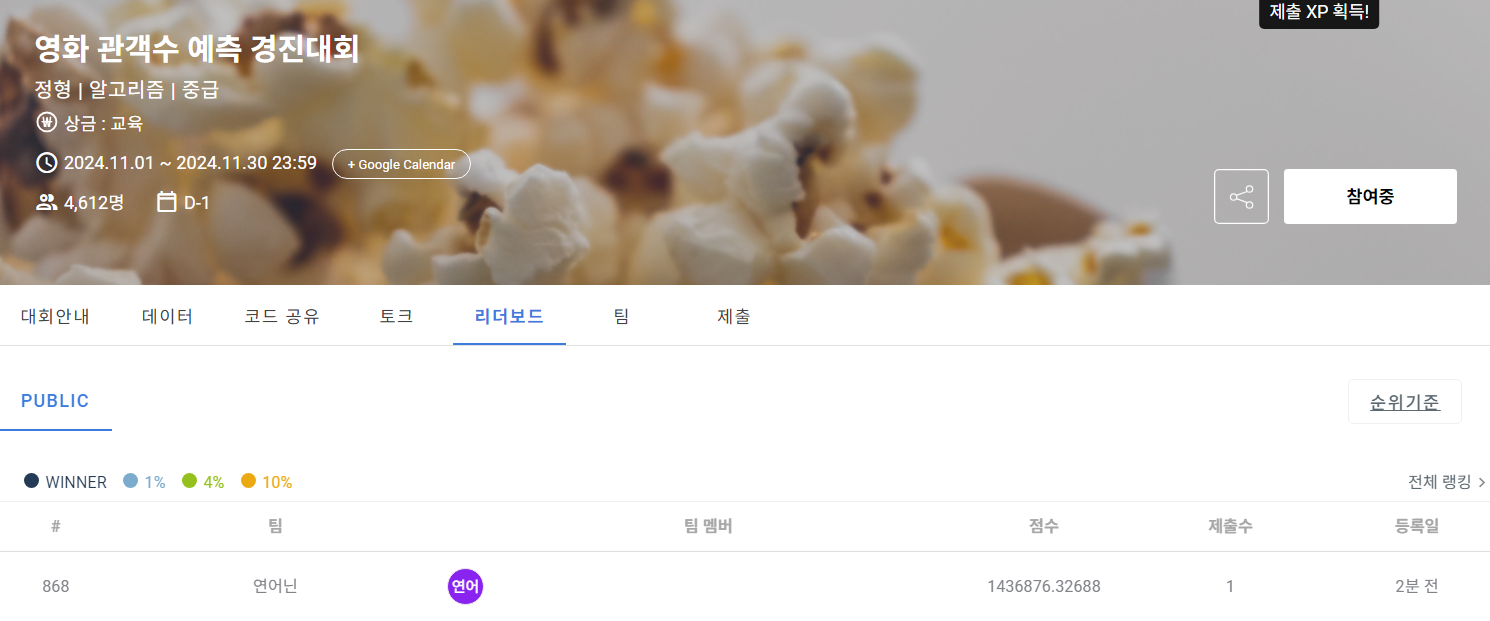